Basado en: https://github.com/Masao-Taketani/StarGAN-tf2

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import os
import numpy as np
from utils import get_models_for_testing, test_image, save_test_results, save_test_results2
from utils import *
from IPython.display import clear_output

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import skimage.transform as sk

ModuleNotFoundError: No module named 'skimage'

In [6]:
from data_loader import get_data, create_labels

In [7]:
# Load trained models
gen, _ = get_models_for_testing()
clear_output(wait=False)

<br><br><br><br>

In [8]:
#train_imgs, train_lbls, test_imgs, test_lbls = get_data("data/celeba/list_attr_celeba.txt",["CT","DWI","ADC"])
train_imgs, train_lbls, test_imgs, test_lbls = get_data("data/celeba-old/list_attr_celeba-old.txt",["CT","DWI","ADC"])
#train_imgs, train_lbls, test_imgs, test_lbls = get_data("data/celeba/list_attr_celeba.txt",["CT","DWI","ADC"])

train len: 348
test len: 348


In [9]:
c_fixed_trg_list = create_labels(test_lbls[:10],
                                     3,
                                     ["CT","DWI","ADC"])
print(c_fixed_trg_list[0].shape)

(10, 3)


In [ ]:
save_test_results(gen, test_imgs[:2], c_fixed_trg_list, "inference/prueba.png")

<br><br><br><br>

In [17]:
def maskbox(fn, crop=False):
    #imgpath = "../../code/cyclegan/cyclegan_tf/data/foscal/maskA/"+fn
    imgpath = "../cyclegan_tf/data-old/foscal/maskA/"+fn
    image = mpimg.imread(imgpath)
    h_start = 0
    h_end = 0
    v_start = 0
    v_end = 0
    if crop:
        image = mycrop(image)
        image = sk.resize(image, (128,128))
    for kk,p in enumerate(np.sum(image[:,:,0], axis=0)):
        if(p!=0):
            h_start = kk
            #print(kk)
            break
    for p in range(image.shape[0]-1,0,-1):
        if(np.sum(image[:,:,0], axis=0)[p]!=0):
            h_end = p
            #print(p)
            break
    for kk,p in enumerate(np.sum(image[:,:,0], axis=1)):
        if(p!=0):
            v_start = kk
            #print(kk)
            break
    for p in range(image.shape[0]-1,0,-1):
        if(np.sum(image[:,:,0], axis=1)[p]!=0):
            v_end = p
            #print(p)
            break
    return h_start,h_end,v_start,v_end

In [13]:
def mycrop(imgaux):
    #imgaux = mpimg.imread(myncct[0])
    if len(imgaux.shape)>2:
        imgauxcrop = imgaux[39:256-39,39:256-39,:]
    else:
        imgauxcrop = imgaux[39:256-39,39:256-39]
#     plt.subplot(1,2,1)
#     plt.imshow(imgaux, cmap="gray")
#     plt.hlines(y=39, xmin=0, xmax=255)
#     plt.hlines(y=217, xmin=0, xmax=255)
#     plt.vlines(x=39, ymin=0, ymax=255)
#     plt.vlines(x=217, ymin=0, ymax=255)
#     plt.subplot(1,2,2)
#     plt.imshow(imgauxcrop, cmap="gray")
#     plt.show()
#     #crop=178/256
    return imgauxcrop

## NCCT to (all)

In [14]:
myncct = []

mypathncct = "../cyclegan_tf/data/custom-ncct2dwi/testA/"
mypathdwi = "../cyclegan_tf/data/custom-adc2dwi/testB/"
mypathadc = "../cyclegan_tf/data/custom-adc2dwi/testA/"

mylist = os.listdir(mypathncct)
mylist.sort()
for i in mylist:
    myncct.append(mypathncct+i)
    #break
len_myncct = len(myncct)

mytest_lbls = []
for i in range(len_myncct):
    mytest_lbls.append([1,0,0])
    
c_fixed_trg_list = create_labels(mytest_lbls[:len_myncct],
                                     3,
                                     ["CT","DWI","ADC"])
print(c_fixed_trg_list[0].shape)

(175, 3)


In [15]:
def test_image2(model, fpath, to_CT, to_DWI, to_ADC, f=None):
    img = read_and_decode_img(fpath)
    #img = tf.image.resize(img, [128,128], method="nearest")
    org = img.numpy() / 255.0
    #plt.figure(frameon=False)
    #plot_image(121, "original image", org)
    img = normalize(img)
    img = tf.expand_dims(img, axis=0)
    c = tf.constant([[int(to_CT), 
                      int(to_DWI), 
                      int(to_ADC)]])
    result = model(img, c)
    result = tf.squeeze(result, axis=0)
    result = denormalize(result)
    result = result.numpy()
    #return result
    #plot_image(122, "generated image", result)
    #fn = fnew(pre, to_CT, to_DWI, to_ADC)
    #plt.imsave("inference/"+fn, result[:,:,0], cmap="gray")
    #plt.savefig("inference/"+fn, bbox_inches="tight")
    return result

../cyclegan_tf/data/custom-ncct2dwi/testA/train_054_ncct_10.png
0.0 1.0
(256, 256, 3)
-1.0 0.99999917


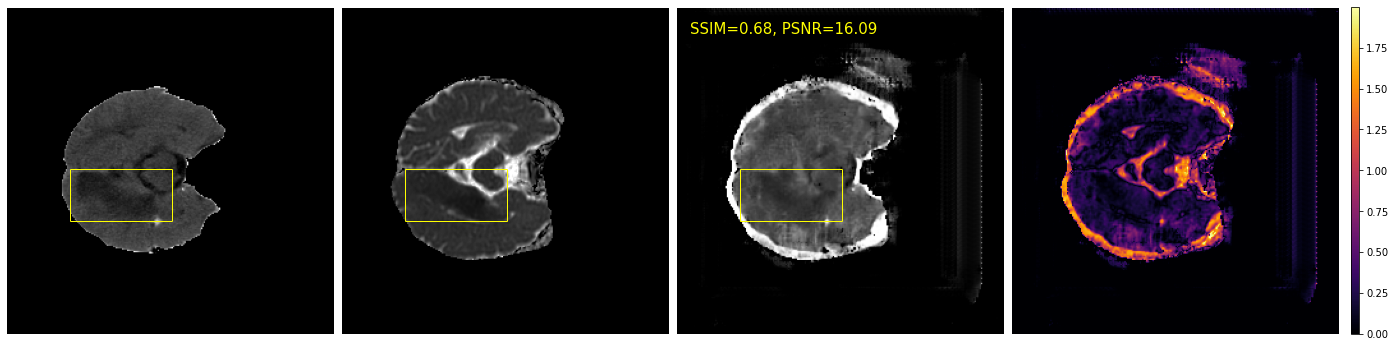

NameError: name 'ssim' is not defined

In [25]:
print(myncct[89:90][0])
#image = mpimg.imread(myncct[89:90][0])
#image = (image*2)-1

image = mpimg.imread("../cyclegan_tf/data/custom-ncct2adc/trainA/train_054_ncct_10.png")
#image = (image*2)-1

#fn = "train_054_r1_mask_10.png"
fn = "train_054_mask_10.png"
h_start,h_end,v_start,v_end = maskbox(fn)

pathimg2 = "../cyclegan_tf/data/custom-ncct2adc/trainB/train_054_adc_10.png"
img2 = mpimg.imread(pathimg2)
img2 = (img2*2)-1

print(np.min(image), np.max(image))
res = test_image2(gen, "../cyclegan_tf/data/custom-ncct2dwi/testA/train_054_ncct_10.png",
                 False, False, True, f=None)
print(res.shape)
print(np.min(res), np.max(res))
s_ncct, s_dwi, s_adc = save_test_results2(gen, myncct[89:90], c_fixed_trg_list, "inference/prueba.png")

plt.figure(figsize=(24,6))

plt.subplot(1,4,1)
plt.imshow(image, cmap="gray")
plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.axis('off')

#h_start,h_end,v_start,v_end = maskbox(fn, crop=True)

plt.subplot(1,4,2)
plt.imshow(img2[:,:,0], cmap="gray")
plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(res[:,:,0], cmap="gray")
plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="solid", lw=1)
plt.text(10,20,"SSIM=0.68, PSNR=16.09", color="yellow", size=15)
plt.axis('off')

plt.subplot(1,4,4)
#plt.imshow(img2[:,:,0]-res[:,:,0], cmap="inferno", vmin=-1, vmax=1)
plt.imshow(np.abs(img2[:,:,0]-res[:,:,0]), cmap="inferno")
plt.axis('off')

#print(np.min(img2[:,:,0]-res[:,:,0]), np.max(img2[:,:,0]-res[:,:,0]))
cax = plt.axes([0.905, 0.125, 0.005, 0.757])
plt.colorbar(cax=cax)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("ncct2adc-sg.png", pad_inches=0, bbox_inches='tight')
plt.show()

s1 = ssim(img2[:,:,0], res[:,:,0])
s2 = psnr(img2[:,:,0], res[:,:,0])
print(s1,s2)

In [ ]:
all_s1 = []
all_s2 = []

all_s3 = []
all_s4 = []

all_s5 = []
all_s6 = []

all_s1m = []
all_s2m = []
#all_s5m = []
#all_s6m = []

for i in mylist:
    fname = mypathncct+i #train_048_10.png
    print(fname)
    myimgorig = mpimg.imread(fname)
    myimgorig = myimgorig[:,:,0]
    myimgorig = (myimgorig*2)-1
    myimgorig = mycrop(myimgorig)
    myimgorig = sk.resize(myimgorig, (128,128))
    
    pts = i.split("_")
    fnamedwi = mypathdwi+pts[0]+"_"+pts[1]+"_dwiss_"+pts[3] #train_048_dwi_10.png
    print(fnamedwi)
    if os.path.isfile(fnamedwi):
        myimgorigdwi = mpimg.imread(fnamedwi)
        myimgorigdwi = myimgorigdwi[:,:,0]
        myimgorigdwi = (myimgorigdwi*2)-1
        myimgorigdwi = mycrop(myimgorigdwi)
        myimgorigdwi = sk.resize(myimgorigdwi, (128,128))
    else:
        print("DWI error in: ",i)
        continue
    
    #pts = i.split("_")
    fnameadc = mypathadc+pts[0]+"_"+pts[1]+"_adc_"+pts[3] #train_048_10.png
    print(fnameadc)
    myimgorigadc = mpimg.imread(fnameadc)
    myimgorigadc = myimgorigadc[:,:,0]
    myimgorigadc = (myimgorigadc*2)-1
    myimgorigadc = mycrop(myimgorigadc)
    myimgorigadc = sk.resize(myimgorigadc, (128,128))
    
    #print(myimgorig.shape)
    s_ncct, s_dwi, s_adc = save_test_results2(gen, [fname], c_fixed_trg_list, "inference/prueba.png")
    #myimg = test_image(gen,filename,True,False,False)
    #print(s_ncct.shape)
#     print(np.min(myimgorig), np.max(myimgorig))
#     print(np.min(myimgorigdwi), np.max(myimgorigdwi))
#     print(np.min(myimgorigadc), np.max(myimgorigadc))
    
#     plt.subplot(1,4,1)
#     plt.imshow(myimgorig, cmap="gray")
#     plt.subplot(1,4,2)
#     plt.imshow(s_ncct, cmap="gray")
#     plt.subplot(1,4,3)
#     plt.imshow(s_dwi, cmap="gray")
#     plt.subplot(1,4,4)
#     plt.imshow(s_adc, cmap="gray")
#     plt.show()
#     print(np.min(s_ncct), np.max(s_ncct))
#     print(np.min(s_dwi), np.max(s_dwi))
#     print(np.min(s_adc), np.max(s_adc))
    
    s1 = ssim(myimgorig, s_adc.numpy())
    s2 = psnr(myimgorig, s_adc.numpy())
    s3 = ssim(myimgorigdwi, s_dwi.numpy())
    s4 = psnr(myimgorigdwi, s_dwi.numpy())
    s5 = ssim(myimgorigadc, s_ncct.numpy())
    s6 = psnr(myimgorigadc, s_ncct.numpy())
    all_s1.append(s1)
    all_s2.append(s2)
    all_s3.append(s3)
    all_s4.append(s4)
    all_s5.append(s5)
    all_s6.append(s6)
    print("ncct", s1, s2)
    print("dwi", s3, s4)
    print("adc", s5, s6)
    
    s1m = s2m = 0
    #s5m = s6m = 0
    auximgpath = "../../code/cyclegan/cyclegan_tf/data/foscal/maskA/"
    fn = pts[0]+"_"+pts[1]+"_mask_"+pts[3] #train_048_mask_10.png
    if os.path.isfile(auximgpath+fn):
        auximg = mpimg.imread(auximgpath+fn)
        auximg = mycrop(auximg)
        auximg = sk.resize(auximg, (128,128))
        h_start,h_end,v_start,v_end = maskbox(fn, crop=True)
        if h_start!=0 and h_end!=0 and v_start!=0 and v_end!=0:
            ws = None
            if myimgorig[h_start:h_end+1,v_start:v_end+1].shape[0]<7 or myimgorig[h_start:h_end+1,v_start:v_end+1].shape[1]<7:
                ws = 3
            s1m = ssim(myimgorig[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1], win_size=ws)
            s2m = psnr(myimgorig[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1])
            all_s1m.append(s1m)
            all_s2m.append(s2m)
            plt.subplot(2,3,1)
            plt.imshow(myimgorig, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.subplot(2,3,2)
            plt.imshow(s_adc, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
#             plt.subplot(2,3,4)
#             plt.imshow(myimgorigadc, cmap="gray")
#             plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
#             plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
#             plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
#             plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
#             plt.subplot(2,3,5)
#             plt.imshow(auximg, cmap="gray")
#             plt.subplot(2,3,6)
#             plt.imshow(s_adc, cmap="gray")
#             plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
#             plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
#             plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
#             plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.show()
            #break
    else:
        print("MASK error in: ",i)
    print("\t ncct-mask", s1m, s2m)
    #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
avg_s3 = np.mean(all_s3)
avg_s4 = np.mean(all_s4)
avg_s5 = np.mean(all_s5)
avg_s6 = np.mean(all_s6)
print("NCCT 2 (all)")
print("NCCT translation", avg_s1, avg_s2)

avg_s1m = np.mean(all_s1m)
avg_s2m = np.mean(all_s2m)
print("\t NCCT-mask translation", avg_s1m, avg_s2m)

print("DWI translation", avg_s3, avg_s4)
print("ADC translation", avg_s5, avg_s6)

## DWI to (all)

In [ ]:
mydwi = []

mypathncct = "../../code/cyclegan/cyclegan_tf/data/custom-ncct2dwi/testA/"
mypathdwi = "../../code/cyclegan/cyclegan_tf/data/custom-adc2dwi/testB/"
mypathadc = "../../code/cyclegan/cyclegan_tf/data/custom-adc2dwi/testA/"

mylist = os.listdir(mypathdwi)
mylist.sort()
for i in mylist:
    mydwi.append(mypathdwi+i)
    #break
len_mydwi = len(mydwi)

mytest_lbls = []
for i in range(len_mydwi):
    mytest_lbls.append([0,1,0])
    
c_fixed_trg_list = create_labels(mytest_lbls[:len_mydwi],
                                     3,
                                     ["CT","DWI","ADC"])
print(c_fixed_trg_list[0].shape)

In [ ]:
all_s1 = []
all_s2 = []

all_s1m = []
all_s2m = []

all_s3 = []
all_s4 = []

all_s5 = []
all_s6 = []

all_s5m = []
all_s6m = []

for i in mylist:
    fname = mypathdwi+i #train_048_dwi_10.png
    print(fname)
    myimgorig = mpimg.imread(fname)
    myimgorig = myimgorig[:,:,0]
    myimgorig = (myimgorig*2)-1
    myimgorig = mycrop(myimgorig)
    myimgorig = sk.resize(myimgorig, (128,128))
    
    pts = i.split("_")
    fnamencct = mypathncct+pts[0]+"_"+pts[1]+"_ncct_"+pts[3] #train_048_10.png
    print(fnamencct)
    if os.path.isfile(fnamencct):
        myimgorigncct = mpimg.imread(fnamencct)
        myimgorigncct = myimgorigncct[:,:,0]
        myimgorigncct = (myimgorigncct*2)-1
        myimgorigncct = mycrop(myimgorigncct)
        myimgorigncct = sk.resize(myimgorigncct, (128,128))
    else:
        print("NCCT error in: ",i)
        continue

    #pts = i.split("_")
    fnameadc = mypathadc+pts[0]+"_"+pts[1]+"_adc_"+pts[3] #train_048_10.png
    #print(fnameadc)
    myimgorigadc = mpimg.imread(fnameadc)
    myimgorigadc = myimgorigadc[:,:,0]
    myimgorigadc = (myimgorigadc*2)-1
    myimgorigadc = mycrop(myimgorigadc)
    myimgorigadc = sk.resize(myimgorigadc, (128,128))
    
    #print(myimgorig.shape)
    s_ncct, s_dwi, s_adc = save_test_results2(gen, [fname], c_fixed_trg_list, "inference/prueba.png")
    #print(s_ncct.shape)
    plt.subplot(1,4,1)
    plt.imshow(myimgorig, cmap="gray")
    plt.subplot(1,4,2)
    plt.imshow(s_dwi, cmap="gray")
    plt.subplot(1,4,3)
    plt.imshow(s_ncct, cmap="gray")
    plt.subplot(1,4,4)
    plt.imshow(s_adc, cmap="gray")
    plt.show()

    s1m = s2m = 0
    s5m = s6m = 0
    auximgpath = "../../code/cyclegan/cyclegan_tf/data/foscal/maskA/"
    fn = pts[0]+"_"+pts[1]+"_mask_"+pts[3] #train_048_mask_10.png
    if os.path.isfile(auximgpath+fn):
        auximg = mpimg.imread(auximgpath+fn)
        auximg = mycrop(auximg)
        auximg = sk.resize(auximg, (128,128))
        h_start,h_end,v_start,v_end = maskbox(fn, crop=True)
        if h_start!=0 and h_end!=0 and v_start!=0 and v_end!=0:
            ws = None
            if myimgorig[h_start:h_end+1,v_start:v_end+1].shape[0]<7 or s_dwi.numpy()[h_start:h_end+1,v_start:v_end+1].shape[1]<7:
                ws = 3
            s1m = ssim(myimgorig[h_start:h_end+1,v_start:v_end+1], s_dwi.numpy()[h_start:h_end+1,v_start:v_end+1], win_size=ws)
            s2m = psnr(myimgorig[h_start:h_end+1,v_start:v_end+1], s_dwi.numpy()[h_start:h_end+1,v_start:v_end+1])
            s5m = ssim(myimgorigadc[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1], win_size=ws)
            s6m = psnr(myimgorigadc[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1])
            all_s1m.append(s1m)
            all_s2m.append(s2m)
            all_s5m.append(s5m)
            all_s6m.append(s6m)
            plt.subplot(2,3,1)
            plt.imshow(myimgorig, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.subplot(2,3,2)
            plt.imshow(auximg, cmap="gray")
            plt.subplot(2,3,3)
            plt.imshow(s_dwi, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            
            plt.subplot(2,3,4)
            plt.imshow(myimgorigadc, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.subplot(2,3,5)
            plt.imshow(auximg, cmap="gray")
            plt.subplot(2,3,6)
            plt.imshow(s_adc, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.show()
            #break
    else:
        print("MASK error in: ",i)
    
    s1 = ssim(myimgorig, s_dwi.numpy())
    s2 = psnr(myimgorig, s_dwi.numpy())
    s3 = ssim(myimgorigncct, s_ncct.numpy())
    s4 = psnr(myimgorigncct, s_ncct.numpy())
    s5 = ssim(myimgorigadc, s_adc.numpy())
    s6 = psnr(myimgorigadc, s_adc.numpy())
    all_s1.append(s1)
    all_s2.append(s2)
    all_s3.append(s3)
    all_s4.append(s4)
    all_s5.append(s5)
    all_s6.append(s6)
    print("dwi", s1, s2)
    print("\t dwi-mask", s1m, s2m)
    print("ncct", s3, s4)
    print("adc", s5, s6)
    print("\t adc-mask", s5m, s6m)
    #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
avg_s1m = np.mean(all_s1m)
avg_s2m = np.mean(all_s2m)

avg_s3 = np.mean(all_s3)
avg_s4 = np.mean(all_s4)

avg_s5 = np.mean(all_s5)
avg_s6 = np.mean(all_s6)
avg_s5m = np.mean(all_s5m)
avg_s6m = np.mean(all_s6m)
print("DWI 2 (all)")
print("DWI translation", avg_s1, avg_s2)
print("\t DWI-mask translation", avg_s1m, avg_s2m)
print("NCCT translation", avg_s3, avg_s4)
print("ADC translation", avg_s5, avg_s6)
print("\t ADC-mask translation", avg_s5m, avg_s6m)

## ADC to (all)

In [ ]:
myadc = []

mypathncct = "../../code/cyclegan/cyclegan_tf/data/custom-ncct2dwi/testA/"
mypathdwi = "../../code/cyclegan/cyclegan_tf/data/custom-adc2dwi/testB/"
mypathadc = "../../code/cyclegan/cyclegan_tf/data/custom-adc2dwi/testA/"

mylist = os.listdir(mypathadc)
mylist.sort()
for i in mylist:
    myadc.append(mypathadc+i)
    #break
len_myadc = len(myadc)

mytest_lbls = []
for i in range(len_myadc):
    mytest_lbls.append([0,0,1])
    
c_fixed_trg_list = create_labels(mytest_lbls[:len_myadc],
                                     3,
                                     ["CT","DWI","ADC"])
print(c_fixed_trg_list[0].shape)

In [ ]:
all_s1 = []
all_s2 = []
all_s1m = []
all_s2m = []

all_s3 = []
all_s4 = []
all_s3m = []
all_s4m = []

all_s5 = []
all_s6 = []

for i in mylist:
    fname = mypathadc+i #train_048_10.png
    print(fname)
    myimgorig = mpimg.imread(fname)
    myimgorig = myimgorig[:,:,0]
    myimgorig = (myimgorig*2)-1
    myimgorig = mycrop(myimgorig)
    myimgorig = sk.resize(myimgorig, (128,128))
    
    pts = i.split("_")
    fnamedwi = mypathdwi+pts[0]+"_"+pts[1]+"_dwiss_"+pts[3] #train_048_10.png
    print(fnamedwi)
    if os.path.isfile(fnamedwi):
        myimgorigdwi = mpimg.imread(fnamedwi)
        myimgorigdwi = myimgorigdwi[:,:,0]
        myimgorigdwi = (myimgorigdwi*2)-1
        myimgorigdwi = mycrop(myimgorigdwi)
        myimgorigdwi = sk.resize(myimgorigdwi, (128,128))
    else:
        print("DWI error in: ",i)
        continue
    
    #pts = i.split("_")
    fnamencct = mypathncct+pts[0]+"_"+pts[1]+"_ncct_"+pts[3] #train_048_10.png
    #print(fnameadc)
    myimgorigncct = mpimg.imread(fnamencct)
    myimgorigncct = myimgorigncct[:,:,0]
    myimgorigncct = (myimgorigncct*2)-1
    myimgorigncct = mycrop(myimgorigncct)
    myimgorigncct = sk.resize(myimgorigncct, (128,128))
    
    #print(myimgorig.shape)
    s_ncct, s_dwi, s_adc = save_test_results2(gen, [fname], c_fixed_trg_list, "inference/prueba.png")
    #print(s_ncct.shape)
#     plt.subplot(1,4,1)
#     plt.imshow(myimgorig[:,:,0], cmap="gray")
#     plt.subplot(1,4,2)
#     plt.imshow(s_dwi, cmap="gray")
#     plt.subplot(1,4,3)
#     plt.imshow(s_ncct, cmap="gray")
#     plt.subplot(1,4,4)
#     plt.imshow(s_adc, cmap="gray")
#     plt.show()
    
    s1m = s2m = 0
    s3m = s4m = 0
    auximgpath = "../../code/cyclegan/cyclegan_tf/data/foscal/maskA/"
    fn = pts[0]+"_"+pts[1]+"_mask_"+pts[3] #train_048_mask_10.png
    if os.path.isfile(auximgpath+fn):
        auximg = mpimg.imread(auximgpath+fn)
        auximg = mycrop(auximg)
        auximg = sk.resize(auximg, (128,128))
        h_start,h_end,v_start,v_end = maskbox(fn, crop=True)
        if h_start!=0 and h_end!=0 and v_start!=0 and v_end!=0:
            ws = None
            if myimgorig[h_start:h_end+1,v_start:v_end+1].shape[0]<7 or s_dwi[h_start:h_end+1,v_start:v_end+1].shape[1]<7:
                ws = 3
            s1m = ssim(myimgorig[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1], win_size=ws)
            s2m = psnr(myimgorig[h_start:h_end+1,v_start:v_end+1], s_adc.numpy()[h_start:h_end+1,v_start:v_end+1])
            s3m = ssim(myimgorigdwi[h_start:h_end+1,v_start:v_end+1], s_dwi.numpy()[h_start:h_end+1,v_start:v_end+1], win_size=ws)
            s4m = psnr(myimgorigdwi[h_start:h_end+1,v_start:v_end+1], s_dwi.numpy()[h_start:h_end+1,v_start:v_end+1])
            all_s1m.append(s1m)
            all_s2m.append(s2m)
            all_s3m.append(s3m)
            all_s4m.append(s4m)
            plt.subplot(2,3,1)
            plt.imshow(myimgorig, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.subplot(2,3,2)
            plt.imshow(auximg, cmap="gray")
            plt.subplot(2,3,3)
            plt.imshow(s_adc, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            
            plt.subplot(2,3,4)
            plt.imshow(myimgorigdwi, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.subplot(2,3,5)
            plt.imshow(auximg, cmap="gray")
            plt.subplot(2,3,6)
            plt.imshow(s_dwi, cmap="gray")
            plt.hlines(y=v_start, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.hlines(y=v_end, xmin=h_start, xmax=h_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_start, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.vlines(x=h_end, ymin=v_start, ymax=v_end, colors="yellow", linestyles="dotted")
            plt.show()
            #break
    else:
        print("MASK error in: ",i)

    s1 = ssim(myimgorig, s_adc.numpy())
    s2 = psnr(myimgorig, s_adc.numpy())
    s3 = ssim(myimgorigdwi, s_dwi.numpy())
    s4 = psnr(myimgorigdwi, s_dwi.numpy())
    s5 = ssim(myimgorigncct, s_ncct.numpy())
    s6 = psnr(myimgorigncct, s_ncct.numpy())
    all_s1.append(s1)
    all_s2.append(s2)
    all_s3.append(s3)
    all_s4.append(s4)
    all_s5.append(s5)
    all_s6.append(s6)
    print("adc", s1, s2)
    print("\t adc-mask", s1m, s2m)
    print("dwi", s3, s4)
    print("\t dwi-mask", s3m, s4m)
    print("ncct", s5, s6)
    #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
avg_s1m = np.mean(all_s1m)
avg_s2m = np.mean(all_s2m)

avg_s3 = np.mean(all_s3)
avg_s4 = np.mean(all_s4)
avg_s3m = np.mean(all_s3m)
avg_s4m = np.mean(all_s4m)

avg_s5 = np.mean(all_s5)
avg_s6 = np.mean(all_s6)
print("ADC 2 (all)")
print("ADC translation", avg_s1, avg_s2)
print("\t ADC-mask translation", avg_s1m, avg_s2m)
print("DWI translation", avg_s3, avg_s4)
print("\t DWI-mask translation", avg_s3m, avg_s4m)
print("NCCT translation", avg_s5, avg_s6)

<br><br><br><br>

In [ ]:
#path = "data/celeba/images/"
path = "data/celeba-old/images/"
#path = "/data/Datasets/stroke/ggarzon/unreg_t0t1_png/"
p = sorted(os.listdir(path))
len(p)
#print(p)

<br><br><br><br>

In [ ]:
c_fixed_trg_list = create_labels(mytest_lbls[:len_myncct],
                                     3,
                                     ["CT","DWI","ADC"])

In [ ]:
f = "ACV-002_20211129192537_8_10.png"
img = mpimg.imread(path+f)

plt.subplot(1,4,1)
plt.imshow(img[:,:,0], cmap="gray")

res1, res2, res3 = save_test_results2(gen, [path+f], c_fixed_trg_list, "inference/prueba.png")

plt.subplot(1,4,2)
plt.imshow(res1, cmap="gray")

res = test_image(gen,path+f,False,True,False,f)

plt.subplot(1,4,3)
plt.imshow(res2, cmap="gray")

res = test_image(gen,path+f,False,False,True,f)

plt.subplot(1,4,4)
plt.imshow(res3, cmap="gray")
plt.show()

In [ ]:
f = "ACV-002_20211129192537_8_10.png"
img = mpimg.imread(path+f)

plt.subplot(1,4,1)
plt.imshow(img[:,:,0], cmap="gray")

res = test_image(gen,path+f,True,False,False,f)

plt.subplot(1,4,2)
plt.imshow(res[:,:,0], cmap="gray")

res = test_image(gen,path+f,False,True,False,f)

plt.subplot(1,4,3)
plt.imshow(res[:,:,0], cmap="gray")

res = test_image(gen,path+f,False,False,True,f)

plt.subplot(1,4,4)
plt.imshow(res[:,:,0], cmap="gray")
plt.show()

In [ ]:
for f in p:
    #if f.split("_")[1]!="ADC" and f.split("_")[1]!="DWI":
    #if f.split("_")[1]=="DWI":
    myimgorig = mpimg.imread(path+f)
    print(f.split("_"))
    if f.split("_")[1]=="DWI":
        #print(f)
        myimg = test_image(gen,path+f,False,True,False,f)
        myimg = myimg[:,:,0]
        fn = f.split(".")[0]+"_DWI.png"
        plt.imsave("inference/"+fn, myimg, cmap="gray")
        
        myimg = test_image(gen,path+f,True,False,False,f)
        myimg = myimg[:,:,0]
        fn = f.split(".")[0]+"_CT.png"
        plt.imsave("inference/"+fn, myimg, cmap="gray")
        
        myimg = test_image(gen,path+f,False,False,True,f)
        myimg = myimg[:,:,0]
        fn = f.split(".")[0]+"_ADC.png"
        plt.imsave("inference/"+fn, myimg, cmap="gray")
        #plt.imshow(myimg)
        #plt.show()
        #break
    else:
        #if f.split("_")[3].split(".")[0]=="ncct":
        if f.split("_")[1]!="ADC":
            #ncct
            myimg = test_image(gen,path+f,True,False,False,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_CT.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")
            
            myimg = test_image(gen,path+f,False,True,False,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_DWI.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")
            
            myimg = test_image(gen,path+f,False,False,True,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_ADC.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")
        else:
            #adc
            myimg = test_image(gen,path+f,False,False,True,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_ADC.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")
            
            myimg = test_image(gen,path+f,False,True,False,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_DWI.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")

            myimg = test_image(gen,path+f,True,False,False,f)
            myimg = myimg[:,:,0]
            fn = f.split(".")[0]+"_CT.png"
            plt.imsave("inference/"+fn, myimg, cmap="gray")
    #break

## SSIM and PSNR

In [ ]:
#path = "data/celeba/images/"
#path = "data/celeba-old/images/"
path2 = "data/celeba-mask-old/images/"
p2 = sorted(os.listdir(path2))
len(p2)
#print(p)

In [ ]:
lista2 = [
["train_000","ACV-002","/data/Datasets/stroke/ISBI_FOSCAL/ACV-002/Masks/Daniel/ADC.nii.gz",10,23],
["train_001","ACV-005","/data/Datasets/stroke/ISBI_FOSCAL/ACV-005/Masks/Daniel/ADC.nii.gz",9,21],

["train_002","ACV-006","/data/Datasets/stroke/ISBI_FOSCAL/ACV-006/Masks/Daniel/ADC.nii.gz",8,24],
["train_003","ACV-014","/data/Datasets/stroke/ISBI_FOSCAL/ACV-014/Masks/Daniel/ADC.nii.gz",9,24],
["train_004","ACV-019","/data/Datasets/stroke/ISBI_FOSCAL/ACV-019/Masks/Daniel/ADC.nii.gz",8,22],
["train_005","ACV-021","/data/Datasets/stroke/ISBI_FOSCAL/ACV-021/Masks/Daniel/ADC.nii.gz",8,21],
["train_006","ACV-031","/data/Datasets/stroke/ISBI_FOSCAL/ACV-031/Masks/Daniel/ADC.nii.gz",9,24],
    ["train_007","ACV-032","normal",8,23],
["train_008","ACV-033","/data/Datasets/stroke/ISBI_FOSCAL/ACV-033/Masks/Daniel/ADC.nii.gz",7,19],
["train_009","ACV-034","/data/Datasets/stroke/ISBI_FOSCAL/ACV-034/Masks/Daniel/ADC.nii.gz",8,23],
["train_010","ACV-036","/data/Datasets/stroke/ISBI_FOSCAL/ACV-036/Masks/Daniel/ADC.nii.gz",8,22],
["train_011","ACV-043","/data/Datasets/stroke/ISBI_FOSCAL/ACV-043/Masks/Daniel/ADC.nii.gz",7,19],
    ["train_012","ACV-044","normal",8,22],
["train_013","ACV-046","/data/Datasets/stroke/ISBI_FOSCAL/ACV-046/Masks/Daniel/ADC.nii.gz",9,24],
["train_014","ACV-049","/data/Datasets/stroke/ISBI_FOSCAL/ACV-049/Masks/Andres/ADC.nii.gz",10,24],
["train_015","ACV-051","/data/Datasets/stroke/ISBI_FOSCAL/ACV-051/Masks/Daniel/ADC.nii.gz",10,23],
["train_016","ACV-052","/data/Datasets/stroke/ISBI_FOSCAL/ACV-052/Masks/Daniel/ADC.nii.gz",9,22],
["train_017","ACV-053","/data/Datasets/stroke/ISBI_FOSCAL/ACV-053/Masks/Andres/ADC.nii.gz",9,21],
["train_018","ACV-054","/data/Datasets/stroke/ISBI_FOSCAL/ACV-054/Masks/Andres/ADC.nii.gz",9,22],
["train_019","ACV-055","/data/Datasets/stroke/ISBI_FOSCAL/ACV-055/Masks/Andres/ADC.nii.gz",9,22],
["train_020","ACV-056","/data/Datasets/stroke/ISBI_FOSCAL/ACV-056/Masks/Andres/ADC.nii.gz",8,21],
["train_021","ACV-057","/data/Datasets/stroke/ISBI_FOSCAL/ACV-057/Masks/Andres/ADC.nii.gz",8,22],
["train_022","ACV-060","/data/Datasets/stroke/ISBI_FOSCAL/ACV-060/Masks/Andres/ADC.nii.gz",9,23],
    ["train_023","ACV-062","normal",9,22],
["train_024","ACV-132","/data/Datasets/stroke/ISBI_FOSCAL/ACV-132/Masks/Daniel/ADC.nii.gz",9,23],
["train_025","ACV-065","/data/Datasets/stroke/ISBI_FOSCAL/ACV-065/Masks/Andres/ADC.nii.gz",9,23],
["train_026","ACV-133","/data/Datasets/stroke/ISBI_FOSCAL/ACV-133/Masks/Daniel/ADC.nii.gz",8,22],
    ["train_027","ACV-140","normal",10,24],
["train_028","ACV-068","/data/Datasets/stroke/ISBI_FOSCAL/ACV-068/Masks/Andres/ADC.nii.gz",9,25],
["train_029","ACV-073","/data/Datasets/stroke/ISBI_FOSCAL/ACV-073/Masks/Andres/ADC.nii.gz",8,22],
["train_030","ACV-074","/data/Datasets/stroke/ISBI_FOSCAL/ACV-074/Masks/Andres/ADC.nii.gz",9,22],
["train_031","ACV-141","/data/Datasets/stroke/ISBI_FOSCAL/ACV-141/Masks/Daniel/ADC.nii.gz",10,24],
["train_032","ACV-142","/data/Datasets/stroke/ISBI_FOSCAL/ACV-142/Masks/Daniel/ADC.nii.gz",9,24],
["train_033","ACV-081","/data/Datasets/stroke/ISBI_FOSCAL/ACV-081/Masks/Andres/ADC.nii.gz",7,21],
["train_034","ACV-082","/data/Datasets/stroke/ISBI_FOSCAL/ACV-082/Masks/Andres/ADC.nii.gz",8,22],
["train_035","ACV-086","/data/Datasets/stroke/ISBI_FOSCAL/ACV-086/Masks/Andres/ADC.nii.gz",8,22],
["train_036","ACV-087","/data/Datasets/stroke/ISBI_FOSCAL/ACV-087/Masks/Daniel/ADC.nii.gz",7,23],
["train_037","ACV-088","/data/Datasets/stroke/ISBI_FOSCAL/ACV-088/Masks/Andres/ADC.nii.gz",9,24],
    ["train_038","ACV-047","normal",9,24],
["train_039","ACV-090","/data/Datasets/stroke/ISBI_FOSCAL/ACV-090/Masks/Andres/ADC.nii.gz",8,22],
["train_040","ACV-092","/data/Datasets/stroke/ISBI_FOSCAL/ACV-092/Masks/Andres/ADC.nii.gz",8,21],
["train_041","ACV-094","/data/Datasets/stroke/ISBI_FOSCAL/ACV-094/Masks/Daniel/ADC.nii.gz",8,21],
["train_042","ACV-095","/data/Datasets/stroke/ISBI_FOSCAL/ACV-095/Masks/Daniel/ADC.nii.gz",7,20],
    ["train_043","ACV-076","normal",8,19],
["train_044","ACV-099","/data/Datasets/stroke/ISBI_FOSCAL/ACV-099/Masks/Daniel/ADC.nii.gz",8,21],
["train_045","ACV-103","/data/Datasets/stroke/ISBI_FOSCAL/ACV-103/Masks/Daniel/ADC.nii.gz",9,24],
["train_046","ACV-104","/data/Datasets/stroke/ISBI_FOSCAL/ACV-104/Masks/Daniel/ADC.nii.gz",9,21],
["train_047","ACV-105","/data/Datasets/stroke/ISBI_FOSCAL/ACV-105/Masks/Daniel/ADC.nii.gz",9,23],
    
    ["train_048","ACV-107","normal",8,21],
["train_049","ACV-108","/data/Datasets/stroke/ISBI_FOSCAL/ACV-108/Masks/Daniel/ADC.nii.gz",9,21],
["train_050","ACV-109","/data/Datasets/stroke/ISBI_FOSCAL/ACV-109/Masks/Daniel/ADC.nii.gz",10,24],
    ["train_051","ACV-110","normal",9,24],
["train_052","ACV-112","/data/Datasets/stroke/ISBI_FOSCAL/ACV-112/Masks/Daniel/ADC.nii.gz",8,23],
["train_053","ACV-118","/data/Datasets/stroke/ISBI_FOSCAL/ACV-118/Masks/Daniel/ADC.nii.gz",8,22],
["train_054","ACV-121","/data/Datasets/stroke/ISBI_FOSCAL/ACV-121/Masks/Daniel/ADC.nii.gz",8,20],
["train_055","ACV-122","/data/Datasets/stroke/ISBI_FOSCAL/ACV-122/Masks/Daniel/ADC.nii.gz",8,22],
["train_056","ACV-123","/data/Datasets/stroke/ISBI_FOSCAL/ACV-123/Masks/Daniel/ADC.nii.gz",9,23],
["train_057","ACV-125","/data/Datasets/stroke/ISBI_FOSCAL/ACV-125/Masks/Daniel/ADC.nii.gz",9,22],
    ["train_058","ACV-128","normal",8,21],
    ["train_059","ACV-129","normal",8,22],
]

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    if f.split("_")[1]=="DWI":
        print(f)
        myimgorig = mpimg.imread(path+f)
        myimg = test_image(gen,path+f,False,False,True,f)
        myimg = myimg[:,:,0]
        #fn = f.split(".")[0]+"_DWI.png"
        
        pts = f.split("_")
        fnew = pts[0]+"_ADC_"+pts[2]
        myimgnew = mpimg.imread(path+fnew)
        myimg = (myimg+1)/2
        
        #print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
        #print("myimg: ", np.min(myimg), np.max(myimg))
        
        plt.subplot(1,3,1)
        plt.imshow(myimgorig[:,:,0], cmap="gray")
        plt.subplot(1,3,2)
        plt.imshow(myimg, cmap="gray")
        plt.subplot(1,3,3)
        plt.imshow(myimgnew[:,:,0], cmap="gray")
        plt.show()
        plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
        plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
        s1 = ssim(myimgnew[:,:,0], myimg)
        s2 = psnr(myimgnew[:,:,0], myimg)
        all_s1.append(s1)
        all_s2.append(s2)
        print("s1: "+str(s1), "\t", "s2: "+str(s2))
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("DWI 2 ADC")
print("ADC translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    if f.split("_")[1]=="DWI":
        print(f[:7])
        #ACV-002_DWI_19.png
        #train_000_ncct_1.png
        #f = "ACV-067"
        try:
            idx = np.where(np.array(lista2)[:,1]==f[:7])[0][0]
            fnew = lista2[idx][0]+"_ncct_"+f.split("_")[2]
            if os.path.exists(path2+fnew):
                myimgorig = mpimg.imread(path+f)
                myimg = test_image(gen,path+f,True,False,False,f)
                myimg = myimg[:,:,0]
                myimg = (myimg+1)/2

                myimgnew = mpimg.imread(path2+fnew)
                myimgnew = sk.rotate(myimgnew, 90)
                print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
                print("myimg: ", np.min(myimg), np.max(myimg))
    #             plt.subplot(1,3,1)
    #             plt.imshow(myimgorig[:,:,0], cmap="gray")
    #             plt.subplot(1,3,2)
    #             plt.imshow(myimg, cmap="gray")
    #             plt.subplot(1,3,3)
    #             plt.imshow(myimgnew[:,:,0], cmap="gray")
    #             plt.show()
    #             #plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
    #             #plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
                s1 = ssim(myimgnew[:,:,0], myimg)
                s2 = psnr(myimgnew[:,:,0], myimg)
                all_s1.append(s1)
                all_s2.append(s2)
                print("s1: "+str(s1), "\t", "s2: "+str(s2))
                #break
        except IndexError:
            print("IndexError: file for "+f+" wasn't found.")
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("DWI 2 NCCT")
print("NCCT translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    if f.split("_")[1]=="ADC":
        print(f)
        myimgorig = mpimg.imread(path+f)
        myimg = test_image(gen,path+f,False,True,False,f)
        myimg = myimg[:,:,0]
        #fn = f.split(".")[0]+"_DWI.png"
        
        pts = f.split("_")
        fnew = pts[0]+"_DWI_"+pts[2]
        myimgnew = mpimg.imread(path+fnew)
        myimg = (myimg+1)/2
        
        #print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
        #print("myimg: ", np.min(myimg), np.max(myimg))
        
#         plt.subplot(1,3,1)
#         plt.imshow(myimgorig[:,:,0], cmap="gray")
#         plt.subplot(1,3,2)
#         plt.imshow(myimg, cmap="gray")
#         plt.subplot(1,3,3)
#         plt.imshow(myimgnew[:,:,0], cmap="gray")
#         plt.show()
#         #plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
#         #plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
        s1 = ssim(myimgnew[:,:,0], myimg)
        s2 = psnr(myimgnew[:,:,0], myimg)
        all_s1.append(s1)
        all_s2.append(s2)
        print("s1: "+str(s1), "\t", "s2: "+str(s2))
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("ADC 2 DWI")
print("DWI translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    if f.split("_")[1]=="ADC":
        print(f[:7])
        #ACV-002_DWI_19.png
        #train_000_ncct_1.png
        #f = "ACV-067"
        try:
            idx = np.where(np.array(lista2)[:,1]==f[:7])[0][0]
            fnew = lista2[idx][0]+"_ncct_"+f.split("_")[2]
            if os.path.exists(path2+fnew):
                myimgorig = mpimg.imread(path+f)
                myimg = test_image(gen,path+f,True,False,False,f)
                myimg = myimg[:,:,0]
                myimg = (myimg+1)/2

                myimgnew = mpimg.imread(path2+fnew)
                myimgnew = sk.rotate(myimgnew, 90)
                print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
                print("myimg: ", np.min(myimg), np.max(myimg))
#                 plt.subplot(1,3,1)
#                 plt.imshow(myimgorig[:,:,0], cmap="gray")
#                 plt.subplot(1,3,2)
#                 plt.imshow(myimg, cmap="gray")
#                 plt.subplot(1,3,3)
#                 plt.imshow(myimgnew[:,:,0], cmap="gray")
#                 plt.show()
#                 #plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
#                 #plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
                s1 = ssim(myimgnew[:,:,0], myimg)
                s2 = psnr(myimgnew[:,:,0], myimg)
                all_s1.append(s1)
                all_s2.append(s2)
                print("s1: "+str(s1), "\t", "s2: "+str(s2))
                #break
        except IndexError:
            print("IndexError: file for "+f+" wasn't found.")
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("ADC 2 NCCT")
print("NCCT translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p2:
    if f.split("_")[2]!="adc" and f.split("_")[2]!="mask":
        print(f)
        #ACV-019_DWI_19.png
        #if f[:9] in np.array(lista2[:,0]):
        if os.path.exists(path+fnewdwi):
            myimgorig = mpimg.imread(path2+f)
            myimg = test_image(gen,path2+f,False,True,False,f)
            myimg = myimg[:,:,0]
            #fn = f.split(".")[0]+"_DWI.png"

            idx = np.where(np.array(lista2)[:,0]==f[:9])[0][0]
            #print(idx)
            #print(lista2[idx][1])
            fnew = lista2[idx][1]+"_DWI_"+f.split("_")[3]
            #fnew = pts[0]+"_DWI_"+pts[3]
            #print(fnew)
            if os.path.exists(path+fnew):
                #myimgnew = np.rot90(mpimg.imread(path+fnew), axs=(1,0))
                myimgnew = sk.rotate(mpimg.imread(path+fnew), -90)
                myimg = (myimg+1)/2

                print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
                print("myimg: ", np.min(myimg), np.max(myimg))

#                 plt.subplot(1,3,1)
#                 plt.imshow(myimgorig[:,:,0], cmap="gray")
#                 plt.subplot(1,3,2)
#                 plt.imshow(myimg, cmap="gray")
#                 plt.subplot(1,3,3)
#                 plt.imshow(myimgnew[:,:,0], cmap="gray")
#                 plt.show()
#                 #plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
#                 #plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
                s1 = ssim(myimgnew[:,:,0], myimg)
                s2 = psnr(myimgnew[:,:,0], myimg)
                all_s1.append(s1)
                all_s2.append(s2)
                print("s1: "+str(s1), "\t", "s2: "+str(s2))
                #break
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("NCCT 2 DWI")
print("DWI translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p2:
    if f.split("_")[2]!="adc" and f.split("_")[2]!="mask":
        print(f)
        #ACV-019_DWI_19.png
        #if f[:9] in np.array(lista2[:,0]):
        if os.path.exists(path+fnewdwi):
            myimgorig = mpimg.imread(path2+f)
            myimg = test_image(gen,path2+f,False,False,True,f)
            myimg = myimg[:,:,0]
            #fn = f.split(".")[0]+"_DWI.png"

            idx = np.where(np.array(lista2)[:,0]==f[:9])[0][0]
            #print(idx)
            #print(lista2[idx][1])
            fnew = lista2[idx][1]+"_ADC_"+f.split("_")[3]
            #fnew = pts[0]+"_DWI_"+pts[3]
            #print(fnew)
            if os.path.exists(path+fnew):
                #myimgnew = np.rot90(mpimg.imread(path+fnew), axs=(1,0))
                myimgnew = sk.rotate(mpimg.imread(path+fnew), -90)
                myimg = (myimg+1)/2

                print("myimgnew: ", np.min(myimgnew), np.max(myimgnew))
                print("myimg: ", np.min(myimg), np.max(myimg))

#                 plt.subplot(1,3,1)
#                 plt.imshow(myimgorig[:,:,0], cmap="gray")
#                 plt.subplot(1,3,2)
#                 plt.imshow(myimg, cmap="gray")
#                 plt.subplot(1,3,3)
#                 plt.imshow(myimgnew[:,:,0], cmap="gray")
#                 plt.show()
#                 #plt.imsave("inference/"+f.replace("DWI","adcpred"), myimg, cmap="gray")
#                 #plt.imsave("inference/"+fnew, myimgnew, cmap="gray")
                s1 = ssim(myimgnew[:,:,0], myimg)
                s2 = psnr(myimgnew[:,:,0], myimg)
                all_s1.append(s1)
                all_s2.append(s2)
                print("s1: "+str(s1), "\t", "s2: "+str(s2))
                #break
        #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("NCCT 2 ADC")
print("ADC translation")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

<br><br><br><br>

In [ ]:
#myimgorig2 = mpimg.imread(path+"ACV-002_20211129192537_8_10.png")
myimgorig2 = mpimg.imread(path+"ACV-002_ADC_11.png")

In [ ]:
to_CT = False
to_DWI = False
to_ADC = True
c = tf.constant([[int(to_CT), 
                      int(to_DWI), 
                      int(to_ADC)]])

pred = gen(myimgorig2[np.newaxis,:,:,:], c)
print(pred.shape)

plt.subplot(1,2,1)
plt.imshow(myimgorig2[:,:,0], cmap="gray")
plt.subplot(1,2,2)
plt.imshow(pred[0,:,:,0], cmap="gray")
plt.show()

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    #print(f.split("_"))
    #if f.split("_")[1]!="ADC" and f.split("_")[1]!="DWI":
    #if f.split("_")[1]=="DWI":
    if f.split("_")[1]=="DWI":
        True
    else:
        #if f.split("_")[3].split(".")[0]=="adc":
        #if f.split("_")[3].split(".")[0]=="ncct":
        if f.split("_")[1]!="ADC":
            print(f)
            #fn = f.split(".")[0]+"_CT.png"
            #fn = f.split(".")[0]+"_DWI.png"
            #fn = f.split(".")[0]+"_ADC.png"
            im1 = mpimg.imread(path+f)
            im2 = mpimg.imread("inference/"+fn)
            #print(im1.shape)
            #print(im2.shape)
            s1 = ssim(im1[:,:,0], im2[:,:,0])
            s2 = psnr(im1[:,:,0], im2[:,:,0])
            all_s1.append(s1)
            all_s2.append(s2)
            print(s1, s2)
    #break

In [ ]:
avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)
print("ADC reconstruction")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
all_s1 = []
all_s2 = []

for f in p:
    #print(f.split("_"))
    #if f.split("_")[1]!="ADC" and f.split("_")[1]!="DWI":
    #if f.split("_")[1]=="DWI":
    if f.split("_")[1]=="DWI":
        print(f)
        #fn = f.split(".")[0]+"_CT.png"
        fn = f.split(".")[0]+"_DWI.png"
        #fn = f.split(".")[0]+"_ADC.png"
        im1 = mpimg.imread(path+f)
        im2 = mpimg.imread("inference/"+fn)
        #print(im1.shape)
        #print(im2.shape)
        s1 = ssim(im1[:,:,0], im2[:,:,0])
        s2 = psnr(im1[:,:,0], im2[:,:,0])
        all_s1.append(s1)
        all_s2.append(s2)
        print(s1, s2)
    #break

avg_s1 = np.mean(all_s1)
avg_s2 = np.mean(all_s2)

In [ ]:
#print("CT reconstruction")
print("DWI reconstruction")
#print("ADC reconstruction")
print("ssim","\t\tpsnr")
avg_s1, avg_s2

In [ ]:
embs_ct = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(True), int(False), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_ct.append(e.numpy())
np.save("embs_ct.npy",embs_ct)

embs_ct = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(True), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_ct.append(e.numpy())
np.save("embs_ct2dwi.npy",embs_ct)

embs_ct = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(False), int(True)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_ct.append(e.numpy())
np.save("embs_ct2adc.npy",embs_ct)

In [ ]:
#path = "data/celeba/images/"
path = "/data/Datasets/stroke/ggarzon/unreg_dwi_png2/"
p = sorted(os.listdir(path))
len(p)

In [ ]:
embs_dwi = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(True), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_dwi.append(e.numpy())
np.save("embs_dwi.npy",embs_dwi)

embs_dwi = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(True), int(False), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_dwi.append(e.numpy())
np.save("embs_dwi2ct.npy",embs_dwi)

embs_dwi = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(False), int(True)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_dwi.append(e.numpy())
np.save("embs_dwi2adc.npy",embs_dwi)

In [ ]:
#path = "data/celeba/images/"
path = "/data/Datasets/stroke/ggarzon/unreg_adc_png2/"
p = sorted(os.listdir(path))
len(p)

In [ ]:
embs_adc = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(False), int(True)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_adc.append(e.numpy())
np.save("embs_adc.npy",embs_adc)

embs_adc = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(False), int(True), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_adc.append(e.numpy())
np.save("embs_adc2dwi.npy",embs_adc)

embs_adc = []
for k,f in enumerate(p):
    x = read_and_decode_img(path+f)
    x = normalize(x)
    x = x[:,:,:3]
    x = tf.expand_dims(x, axis=0)
    x = tf.cast(x,tf.float32)
    c = tf.constant([[int(True), int(False), int(False)]])
    c = tf.cast(c,tf.float32)
    emb = gen.extract_emb(x,c)
    l = tf.keras.layers.GlobalAveragePooling2D()
    e = l(emb)[0]
    embs_adc.append(e.numpy())
np.save("embs_adc2ct.npy",embs_adc)